#**IOT INTRUSION DETECTION**

# **IOT**

 IoT stands for the "**Internet** of Things". It refers  the network of physical objects or things  with sensors, software, and other technologies that enable them to collect and exchange data over the internet.

# **Introduction**

IOT intrusion detrction is used to detect the malicious and unwanted activity in the iot network system.Like thefting the data,malware attack.
 IDS is a system used to alert the attacks from the network.It is used to protect from the attacks.the benifits of IDS is to increasing the security,alert warings,etc..

 Intrusion detection system are necessary to address emerging threats and vulnerabilities in the dynamic IoT landscape

# **Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# **IMPORTING** THE DATASET

Dataset is defined as df in the model

In [ ]:
df = pd.read_csv('ids-2017 Dataset.csv')

In [3]:
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,83343831.92,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,82926067.47,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,83127993.93,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,83015696.38,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,82972999.18,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [4]:
df.tail()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
1048570,1.391925,108.00,6.0,64.00,1.437685,1.437685,0.0,0,1,0,...,0.000000,54.00,8.336550e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
1048571,0.000000,2.14,46.7,65.91,0.000000,0.000000,0.0,0,0,0,...,5.281048,588.22,8.367732e+07,9.5,34.370618,7.497140,469.190222,0.06,141.55,Mirai-greeth_flood
1048572,0.132971,30847.00,17.0,64.00,5978.034950,5978.034950,0.0,0,0,0,...,0.000000,50.00,8.312373e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
1048573,0.000000,54.00,6.0,64.00,25.672981,25.672981,0.0,1,0,1,...,0.000000,54.00,8.334509e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1048574,128.443556,4264.30,7.1,98.80,13.640648,13.640648,0.0,0,0,0,...,114.400450,96.70,1.665173e+08,13.5,17.124571,162.030508,13140.079760,1.00,244.60,BenignTraffic


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 47 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   flow_duration    1048575 non-null  float64
 1   Header_Length    1048575 non-null  float64
 2   Protocol Type    1048575 non-null  float64
 3   Duration         1048575 non-null  float64
 4   Rate             1048575 non-null  float64
 5   Srate            1048575 non-null  float64
 6   Drate            1048575 non-null  float64
 7   fin_flag_number  1048575 non-null  int64  
 8   syn_flag_number  1048575 non-null  int64  
 9   rst_flag_number  1048575 non-null  int64  
 10  psh_flag_number  1048575 non-null  int64  
 11  ack_flag_number  1048575 non-null  int64  
 12  ece_flag_number  1048575 non-null  int64  
 13  cwr_flag_number  1048575 non-null  int64  
 14  ack_count        1048575 non-null  float64
 15  syn_count        1048575 non-null  float64
 16  fin_count        1

In [6]:
df.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [7]:
df.shape

(1048575, 47)

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(1048575, 47)

***Exploratory Data Analysis (EDA)***

#**Depedent variable "LABEL"**

 Label in the dataset indicates whether the traffic sample is normal or malicious. This information is essential for training and evaluating IDSs because it allows the IDS to learn how to distinguish between normal and malicious traffic.

In [10]:
# print the unique variables
unique_categories = df['label'].unique()
print(unique_categories)

['DDoS-RSTFINFlood' 'DoS-TCP_Flood' 'DDoS-ICMP_Flood' 'DoS-UDP_Flood'
 'DoS-SYN_Flood' 'Mirai-greeth_flood' 'DDoS-SynonymousIP_Flood'
 'Mirai-udpplain' 'DDoS-SYN_Flood' 'DDoS-PSHACK_Flood' 'DDoS-TCP_Flood'
 'DDoS-UDP_Flood' 'BenignTraffic' 'MITM-ArpSpoofing'
 'DDoS-ACK_Fragmentation' 'Mirai-greip_flood' 'DoS-HTTP_Flood'
 'DDoS-ICMP_Fragmentation' 'Recon-PortScan' 'DNS_Spoofing'
 'DDoS-UDP_Fragmentation' 'Recon-OSScan' 'XSS' 'DDoS-HTTP_Flood'
 'Recon-HostDiscovery' 'CommandInjection' 'VulnerabilityScan'
 'DDoS-SlowLoris' 'Backdoor_Malware' 'BrowserHijacking'
 'DictionaryBruteForce' 'SqlInjection' 'Recon-PingSweep'
 'Uploading_Attack']


In [11]:
# calculate the category counts
category_counts = df['label'].value_counts()
print(category_counts)

DDoS-ICMP_Flood            161281
DDoS-UDP_Flood             121205
DDoS-TCP_Flood             101293
DDoS-PSHACK_Flood           92395
DDoS-SYN_Flood              91644
DDoS-RSTFINFlood            90823
DDoS-SynonymousIP_Flood     80680
DoS-UDP_Flood               74787
DoS-TCP_Flood               59807
DoS-SYN_Flood               45207
BenignTraffic               24476
Mirai-greeth_flood          22115
Mirai-udpplain              20166
Mirai-greip_flood           16952
DDoS-ICMP_Fragmentation     10223
MITM-ArpSpoofing             7019
DDoS-ACK_Fragmentation       6431
DDoS-UDP_Fragmentation       6431
DNS_Spoofing                 4034
Recon-HostDiscovery          3007
Recon-OSScan                 2225
Recon-PortScan               1863
DoS-HTTP_Flood               1680
VulnerabilityScan             809
DDoS-HTTP_Flood               626
DDoS-SlowLoris                493
DictionaryBruteForce          324
BrowserHijacking              140
SqlInjection                  122
CommandInjecti

In [12]:
df.shape

(1048575, 47)

# **Data Visualization**



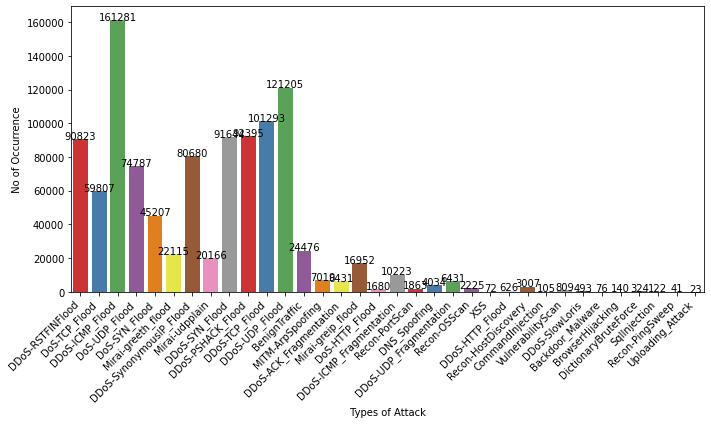

In [13]:
# Visualize the distribution of the different categories
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, palette='Set1', order=unique_categories)
plt.xlabel(' Types of Attack ')
plt.ylabel(' No of Occurrence ')
plt.xticks(rotation=45, ha='right')

# Add the count of each label dependent variable at each of the bar
for i in range(len(unique_categories)):
    count = df[df['label'] == unique_categories[i]].shape[0]
    plt.annotate(str(count), (i,count), ha='center')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [14]:
df.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.763553e+00,7.759537e+04,9.062979e+00,6.635523e+01,9.146945e+03,9.146945e+03,1.807621e-06,8.655842e-02,2.073090e-01,9.057149e-02,...,1.248502e+02,3.345817e+01,1.248978e+02,8.317382e+07,9.497998e+00,1.312711e+01,4.728151e+01,3.147998e+04,9.635824e-02,1.414999e+02
std,2.965660e+02,4.664043e+05,8.936737e+00,1.408680e+01,9.974794e+04,9.974794e+04,8.501385e-04,2.811870e-01,4.053790e-01,2.869989e-01,...,2.420296e+02,1.622552e+02,2.429223e+02,1.703857e+07,8.187710e-01,8.639921e+00,2.294819e+02,3.645895e+05,2.327718e-01,2.105725e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,2.087155e+00,2.087155e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e+01,0.000000e+00,5.000000e+01,8.307157e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
50%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,1.581371e+01,1.581371e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.400000e+01,0.000000e+00,5.400000e+01,8.312452e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
75%,1.042881e-01,2.781200e+02,1.428000e+01,6.400000e+01,1.174380e+02,1.174380e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.405208e+01,3.777740e-01,5.406000e+01,8.334390e+07,9.500000e+00,1.039675e+01,5.059213e-01,1.370916e+00,8.000000e-02,1.415500e+02
max,9.943576e+04,9.815555e+06,4.700000e+01,2.550000e+02,7.340032e+06,7.340032e+06,8.484654e-01,1.000000e+00,1.000000e+00,1.000000e+00,...,8.040961e+03,1.099626e+04,1.309800e+04,1.676394e+08,1.500000e+01,1.252094e+02,1.555106e+04,1.372844e+08,1.000000e+00,2.446000e+02


One Hot Encoding

One-hot encoding is a technique used to convert categorical data into a numerical format that can be used by machine learning algorithm

**df.dropna(inplace=True**) :  Drops any rows containing NULL values from the DataFrame.

**inplace=True**  : The changes will be applied directly to the DataFrame itself not return a new DataFrame.

**df.reset_index(inplace=True, drop=True)**: After dropping rows with NULL values,this line resets the index of the DataFrame.

**(drop=True)** : parameter ensures that the old index is not retained as a new column in the DataFrame, and it is removed entirely.

**LabelEncoder** : used encode the categorical target variables as integers.

**fit_transform()** : used to encode unique values in the 'label' column and transforms those values into integer labels



**num_col = df.select_dtypes(include='number').columns** : Retrieves the column names of numeric columns and stores them in the variable
as (num_col)

**cat_col**  : will be a new Index object containing the names of columns that are not numeric

**cat_col = cat_col[1:]**: remove a specific column from the categorical columns,excluding the first element (index 0) .


In [15]:
# drop NULLs & reset index
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

# encoding the target / label
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])


# view
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 47 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   flow_duration    1048575 non-null  float64
 1   Header_Length    1048575 non-null  float64
 2   Protocol Type    1048575 non-null  float64
 3   Duration         1048575 non-null  float64
 4   Rate             1048575 non-null  float64
 5   Srate            1048575 non-null  float64
 6   Drate            1048575 non-null  float64
 7   fin_flag_number  1048575 non-null  int64  
 8   syn_flag_number  1048575 non-null  int64  
 9   rst_flag_number  1048575 non-null  int64  
 10  psh_flag_number  1048575 non-null  int64  
 11  ack_flag_number  1048575 non-null  int64  
 12  ece_flag_number  1048575 non-null  int64  
 13  cwr_flag_number  1048575 non-null  int64  
 14  ack_count        1048575 non-null  float64
 15  syn_count        1048575 non-null  float64
 16  fin_count        1

In [16]:
num_col = df.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = df.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index([], dtype='object')

In [17]:
# creating a dataframe with only categorical attributes
df_cat = df[cat_col].copy()
df_cat.head()

""
0
1
2
3
4


In [18]:
df.shape

(1048575, 47)

**NORMALIZATION**

Normalization is a data preprocessing technique that scales numeric
features to a specific range or distribution, typically between 0 and 1 (Min-Max normalization).




**num_col :** will contain all numeric columns

**select_dtypes(include='number')** : used to filter the numeric columns.

**num_col.remove('flow_duration') :**  removes the column from the list of numeric columns.

**num_col.remove('label') :**  removes the column 'label' from the list of numeric columns.



In [19]:
# selecting numeric attributes columns from data
num_col = list(df.select_dtypes(include='number').columns)
num_col.remove('flow_duration')
num_col.remove('label')
print(num_col)

['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']


**MinMaxScaler** : used to normalize specific columns of a DataFrame

In [20]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

# data before normalization
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,83343831.92,9.5,10.392305,0.000000,0.000000,0.00,141.55,9
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,82926067.47,9.5,10.464666,4.010353,160.987842,0.05,141.55,20
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,83127993.93,9.5,9.165151,0.000000,0.000000,0.00,141.55,6
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,83015696.38,9.5,10.000000,0.000000,0.000000,0.00,141.55,21
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,82972999.18,9.5,11.346876,32.716243,3016.808286,0.19,141.55,19


In [21]:
# calling normalization() function
df = normalization(df.copy(),num_col)

# data after normalization
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.000006,0.127660,0.250980,4.493266e-08,4.493266e-08,0.0,1.0,0.0,1.0,...,0.000000,0.000919,0.497161,0.607143,0.010575,0.000000,0.000000,0.00,0.57697,9
1,0.000000,0.000006,0.134681,0.250980,5.845419e-07,5.845419e-07,0.0,0.0,0.0,0.0,...,0.000257,0.001152,0.494669,0.607143,0.011198,0.000258,0.000001,0.05,0.57697,20
2,0.000000,0.000000,0.021277,0.250980,4.549953e-06,4.549953e-06,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.495874,0.607143,0.000000,0.000000,0.000000,0.00,0.57697,6
3,0.328175,0.007761,0.361702,0.250980,6.324404e-04,6.324404e-04,0.0,0.0,0.0,0.0,...,0.000000,0.000613,0.495204,0.607143,0.007194,0.000000,0.000000,0.00,0.57697,21
4,0.117320,0.000010,0.130000,0.258471,8.449842e-07,8.449842e-07,0.0,0.0,1.0,0.0,...,0.002102,0.001216,0.494949,0.607143,0.018801,0.002104,0.000022,0.19,0.57697,19


DATA PREPROCESSING

LABEL ENCODING

**Binary Labels**

**bin_label :**  where the 'label' column from the original DataFrame is mapped to 'normal' if the value is 0 and 'abnormal' if the value is not 0

**bin_label.apply(le1.fit_transform) :** Replace the 'label' column in DataFrame with the label-encoded values (0s and 1s)



In [22]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(df.label.map(lambda x:'normal' if x==0 else 'abnormal'))

# creating a dataframe with binary labels (normal,abnormal)
bin_df = df.copy()
bin_df['label'] = bin_label

# label encoding (0,1) binary labels
le = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le.fit_transform)
bin_df['label'] = enc_label

le.classes_

array(['abnormal', 'normal'], dtype=object)

# ***Correlation between features of dataset***

In [23]:
num_col.append('label')

#**Correlation Matrix for Binary Labels**

<AxesSubplot:>

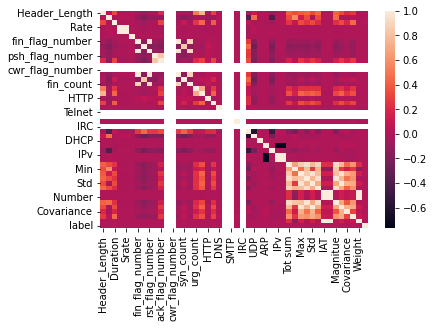

In [24]:
# finding the attributes which have more than 0 correlation with encoded attack label attribute
corr_bin = bin_df[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)

# FEATURE SELECTION

In [25]:
# finding the attributes which have more than correlation with encoded attack label attribute
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0]
highest_corr_bin.sort_values(ascending=True)

DHCP               0.000012
Drate              0.000018
SSH                0.000066
ARP                0.000070
LLC                0.000091
IPv                0.000091
DNS                0.000099
HTTP               0.000164
Protocol Type      0.000314
Rate               0.000389
Srate              0.000389
ack_count          0.000461
Header_Length      0.000603
TCP                0.000985
rst_count          0.001561
UDP                0.001674
syn_count          0.001976
fin_flag_number    0.002621
psh_flag_number    0.002646
fin_count          0.002674
rst_flag_number    0.002687
Min                0.002865
Covariance         0.003372
ICMP               0.003762
urg_count          0.003794
syn_flag_number    0.004354
AVG                0.005272
Tot sum            0.006687
Magnitue           0.006910
Tot size           0.007054
Std                0.007767
Radius             0.007767
HTTPS              0.008727
Number             0.008777
Weight             0.008792
Max                0

In [26]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
bin_cols

Index(['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'SSH',
       'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
       'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius',
       'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [27]:
# Binary labelled Dataset
bin_df = bin_df[bin_cols].copy()
bin_df

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,5.501472e-06,0.127660,0.250980,4.493266e-08,4.493266e-08,0.0,1.0,0.0,1.0,0.0,...,0.000000,0.000919,0.497161,0.607143,0.010575,0.000000,0.000000,0.00,0.57697,0
1,5.811184e-06,0.134681,0.250980,5.845419e-07,5.845419e-07,0.0,0.0,0.0,0.0,0.0,...,0.000257,0.001152,0.494669,0.607143,0.011198,0.000258,0.000001,0.05,0.57697,0
2,0.000000e+00,0.021277,0.250980,4.549953e-06,4.549953e-06,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.495874,0.607143,0.000000,0.000000,0.000000,0.00,0.57697,0
3,7.760641e-03,0.361702,0.250980,6.324404e-04,6.324404e-04,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000613,0.495204,0.607143,0.007194,0.000000,0.000000,0.00,0.57697,0
4,1.036416e-05,0.130000,0.258471,8.449842e-07,8.449842e-07,0.0,0.0,1.0,0.0,0.0,...,0.002102,0.001216,0.494949,0.607143,0.018801,0.002104,0.000022,0.19,0.57697,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.100294e-05,0.127660,0.250980,1.958691e-07,1.958691e-07,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000919,0.497291,0.607143,0.010575,0.000000,0.000000,0.00,0.57697,0
1048571,2.180213e-07,0.993617,0.258471,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.000480,0.041837,0.499151,0.607143,0.217206,0.000482,0.000003,0.06,0.57697,0
1048572,3.142665e-03,0.361702,0.250980,8.144426e-04,8.144426e-04,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000613,0.495848,0.607143,0.007194,0.000000,0.000000,0.00,0.57697,0
1048573,5.501472e-06,0.127660,0.250980,3.497666e-06,3.497666e-06,0.0,1.0,0.0,1.0,0.0,...,0.000000,0.000919,0.497169,0.607143,0.010575,0.000000,0.000000,0.00,0.57697,0


In [28]:
X = bin_df.drop(columns=['label'],axis=1)
Y = bin_df['label']

In [29]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load your IoT dataset (replace with your actual dataset)
# X should contain your feature data, and y should contain the corresponding labels (0 for normal, 1 for intrusion).
# You may need to perform feature engineering and preprocessing on your data.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)  # Set random state for reproducibility

# Train the Logistic Regression classifier
lr_classifier.fit(X_train, y_train)

# Make predictions on the test data using Logistic Regression
y_pred_lr = lr_classifier.predict(X_test)

# Calculate accuracy and print classification report for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_lr}")
print("Classification Report:\n", report_lr)


c:\Users\Sri Nithsh Rajkumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sri Nithsh Rajkumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sri Nithsh Rajkumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c


Logistic Regression Results:
Accuracy: 0.999952316238705
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    209705
           1       0.00      0.00      0.00        10

    accuracy                           1.00    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       1.00      1.00      1.00    209715



In [30]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load your IoT dataset (replace with your actual dataset)
# X should contain your feature data, and y should contain the corresponding labels (0 for normal, 1 for intrusion).
# You may need to perform feature engineering and preprocessing on your data.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1)  # You can choose different kernel functions and adjust C parameter

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.999952316238705
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    209705
           1       0.00      0.00      0.00        10

    accuracy                           1.00    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       1.00      1.00      1.00    209715



c:\Users\Sri Nithsh Rajkumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sri Nithsh Rajkumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sri Nithsh Rajkumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [31]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your IoT dataset (replace with your actual dataset)
# X should contain your feature data, and y should contain the corresponding labels (0 for normal, 1 for intrusion).
# You may need to perform feature engineering and preprocessing on your data.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data using Random Forest
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy and print classification report for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", report_rf)



Random Forest Results:
Accuracy: 0.999980926495482
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    209705
           1       1.00      0.60      0.75        10

    accuracy                           1.00    209715
   macro avg       1.00      0.80      0.87    209715
weighted avg       1.00      1.00      1.00    209715



In [32]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your IoT dataset (replace with your actual dataset)
# X should contain your feature data, and y should contain the corresponding labels (0 for normal, 1 for intrusion).
# You may need to perform feature engineering and preprocessing on your data.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data using KNN
y_pred_knn = knn_classifier.predict(X_test)

# Calculate accuracy and print classification report for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("K-Nearest Neighbors Results:")
print(f"Accuracy: {accuracy_knn}")
print("Classification Report:\n", report_knn)


c:\Users\Sri Nithsh Rajkumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors Results:
Accuracy: 0.999952316238705
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    209705
           1       0.00      0.00      0.00        10

    accuracy                           1.00    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       1.00      1.00      1.00    209715



c:\Users\Sri Nithsh Rajkumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sri Nithsh Rajkumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sri Nithsh Rajkumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [33]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your IoT dataset (replace with your actual dataset)
# X should contain your feature data, and y should contain the corresponding labels (0 for normal, 1 for intrusion).
# You may need to perform feature engineering and preprocessing on your data.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting Classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data using Gradient Boosting
y_pred_gb = gb_classifier.predict(X_test)

# Calculate accuracy and print classification report for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)

print("Gradient Boosting Results:")
print(f"Accuracy: {accuracy_gb}")
print("Classification Report:\n", report_gb)

Gradient Boosting Results:
Accuracy: 0.999971389743223
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    209705
           1       0.70      0.70      0.70        10

    accuracy                           1.00    209715
   macro avg       0.85      0.85      0.85    209715
weighted avg       1.00      1.00      1.00    209715



In [34]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your IoT dataset (replace with your actual dataset)
# X should contain your feature data, and y should contain the corresponding labels (0 for normal, 1 for intrusion).
# You may need to perform feature engineering and preprocessing on your data.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the test data using Decision Tree
y_pred_decision_tree = decision_tree_classifier.predict(X_test)

# Calculate accuracy and print classification report for Decision Tree
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
report_decision_tree = classification_report(y_test, y_pred_decision_tree)

print("Decision Tree Results:")
print(f"Accuracy: {accuracy_decision_tree}")
print("Classification Report:\n", report_decision_tree)


Decision Tree Results:
Accuracy: 0.9999237059819278
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    209705
           1       0.35      0.70      0.47        10

    accuracy                           1.00    209715
   macro avg       0.67      0.85      0.73    209715
weighted avg       1.00      1.00      1.00    209715



In [71]:
# ... your existing code for training and evaluating each model ...

# Define a dictionary to store model names and their accuracies
models = {
    "Logistic Regression": accuracy_lr,
    "SVC": accuracy,  # Assuming you have the accuracy for SVC stored in a variable
    "Random Forest": accuracy_rf,
    "K-Nearest Neighbors": accuracy_knn,  # Assuming you have the accuracy for KNN stored in a variable
    "Gradient Boosting": accuracy_gb,  # Assuming you have the accuracy for Gradient Boosting stored in a variable
    "Decision Tree": accuracy_decision_tree,  # Assuming you have the accuracy for Decision Tree stored in a variable
}

# Sort models dictionary by accuracy in descending order
sorted_models = dict(sorted(models.items(), key=lambda item: item[1], reverse=True))

# Get the maximum model name length for consistent formatting
max_name_length = max(len(name) for name in sorted_models.keys())

# Print the table header
print("\nModel Performance Summary")
print(f"{'Model Name':>{max_name_length + 2}} {'Accuracy'}         {'  Accuracy (%)'}")
print("-" * (max_name_length + 40))

# Print entries from the sorted dictionary
for name, accuracy in sorted_models.items():
    print(f"{name:>{max_name_length + 2}} {accuracy:.8f}{' -  ':>{len('Accuracy')}s}  {accuracy * 100:.4f} %")



Model Performance Summary
           Model Name Accuracy           Accuracy (%)
-----------------------------------------------------------
        Random Forest 0.99998093     -    99.9981 %
    Gradient Boosting 0.99997139     -    99.9971 %
  Logistic Regression 0.99995232     -    99.9952 %
  K-Nearest Neighbors 0.99995232     -    99.9952 %
                  SVC 0.99992371     -    99.9924 %
        Decision Tree 0.99992371     -    99.9924 %


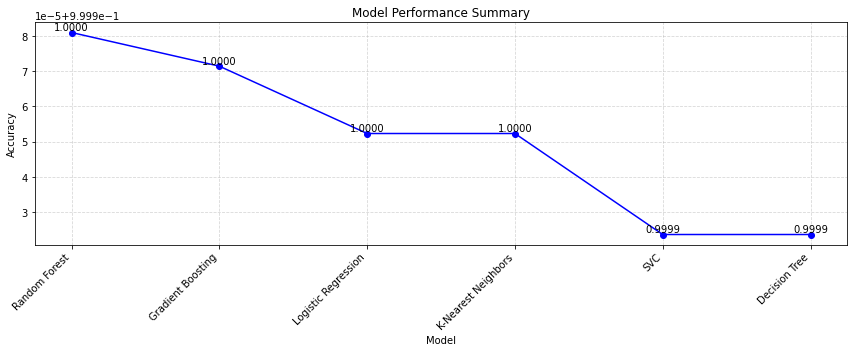

In [97]:
import matplotlib.pyplot as plt

# Extract model names and accuracies from the sorted dictionary
model_names = list(sorted_models.keys())
accuracies = list(sorted_models.values())

# Create a line plot
plt.figure(figsize=(12, 5))
plt.plot(model_names, accuracies, marker='o', color='b', linestyle='-')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Summary')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add accuracy values as text labels on each point
for i, (name, acc) in enumerate(zip(model_names, accuracies)):
    plt.text(i, acc, f'{acc:.4f}', ha='center', va='bottom')

# Show grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()
